In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [2]:
df=pd.read_csv('SalaryData_Test(1).csv')

In [3]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
df.duplicated().sum()

930

In [5]:
df[df.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [6]:
df.shape

(15060, 14)

In [7]:
idx=df[df.duplicated()].index
idx

Int64Index([  551,   601,   681,   799,  1044,  1160,  1181,  1317,  1396,
             1400,
            ...
            14977, 14978, 14982, 14998, 15037, 15043, 15044, 15049, 15052,
            15053],
           dtype='int64', length=930)

In [8]:
df=df.drop(idx,axis=0).reset_index(drop=True)
df.shape

(14130, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14130 entries, 0 to 14129
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            14130 non-null  int64 
 1   workclass      14130 non-null  object
 2   education      14130 non-null  object
 3   educationno    14130 non-null  int64 
 4   maritalstatus  14130 non-null  object
 5   occupation     14130 non-null  object
 6   relationship   14130 non-null  object
 7   race           14130 non-null  object
 8   sex            14130 non-null  object
 9   capitalgain    14130 non-null  int64 
 10  capitalloss    14130 non-null  int64 
 11  hoursperweek   14130 non-null  int64 
 12  native         14130 non-null  object
 13  Salary         14130 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.5+ MB


In [10]:
df['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

<AxesSubplot:ylabel='Salary'>

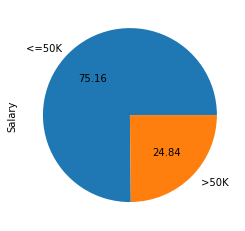

In [11]:
df['Salary'].value_counts().plot(kind='pie',autopct='%0.2f')

In [12]:
obj_col = df.loc[:, df.dtypes == object].columns
obj_col

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [13]:
for i in obj_col:
    data = df[i].unique()
    print("Column:     {} || {}".format(i,data))

Column:     workclass || [' Private' ' Local-gov' ' Self-emp-not-inc' ' Federal-gov' ' State-gov'
 ' Self-emp-inc' ' Without-pay']
Column:     education || [' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' 5th-6th' ' Assoc-voc' ' 9th'
 ' Doctorate' ' 12th' ' 1st-4th' ' Preschool']
Column:     maritalstatus || [' Never-married' ' Married-civ-spouse' ' Widowed' ' Separated'
 ' Divorced' ' Married-spouse-absent' ' Married-AF-spouse']
Column:     occupation || [' Machine-op-inspct' ' Farming-fishing' ' Protective-serv'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' Armed-Forces']
Column:     relationship || [' Own-child' ' Husband' ' Not-in-family' ' Unmarried' ' Wife'
 ' Other-relative']
Column:     race || [' Black' ' White' ' Other' ' Amer-Indian-Eskimo' ' Asian-Pac-Islander']
Column:     sex || [' M

In [14]:
for i in obj_col:
    data = df[i].value_counts()
    print("Column: {} ||\n{}\n\n".format(i,data))

Column: workclass ||
 Private             10138
 Self-emp-not-inc     1279
 Local-gov            1017
 State-gov             664
 Self-emp-inc          565
 Federal-gov           460
 Without-pay             7
Name: workclass, dtype: int64


Column: education ||
 HS-grad         4473
 Some-college    3014
 Bachelors       2369
 Masters          864
 Assoc-voc        634
 11th             542
 Assoc-acdm       493
 10th             395
 7th-8th          265
 Prof-school      241
 9th              219
 12th             194
 Doctorate        168
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64


Column: maritalstatus ||
 Married-civ-spouse       6490
 Never-married            4501
 Divorced                 2026
 Separated                 470
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64


Column: occupation ||
 Prof-specialty       1899
 Exec-managerial      1897

In [15]:
data_clean=df.copy()

# Feature Selection

In [16]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
14126,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
14127,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
14128,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [17]:
from sklearn.preprocessing import LabelEncoder
for i in obj_col:
    le = LabelEncoder()
    df[i] =le.fit_transform(df[i])

In [18]:
df.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.092686,-0.004167,0.021979,-0.245822,-0.003881,-0.241180,0.035180,0.075150,0.076765,0.053172,0.088090,0.001787,0.216703
workclass,0.092686,1.000000,0.021149,0.047708,-0.030821,0.020147,-0.063257,0.064707,0.062290,0.031858,0.007808,0.051189,-0.000432,0.011495
education,-0.004167,0.021149,1.000000,0.361666,-0.044471,-0.017227,-0.013293,0.007635,-0.027574,0.030424,0.024271,0.064155,0.075685,0.092476
educationno,0.021979,0.047708,0.361666,1.000000,-0.070693,0.093437,-0.080444,0.030924,0.000603,0.132346,0.085651,0.127779,0.099699,0.326777
maritalstatus,-0.245822,-0.030821,-0.044471,-0.070693,1.000000,-0.001040,0.172341,-0.076084,-0.114448,-0.042549,-0.033647,-0.165199,-0.017963,-0.185870
occupation,-0.003881,0.020147,-0.017227,0.093437,-0.001040,1.000000,-0.054695,0.004326,0.050982,0.011623,0.012946,0.014548,0.003006,0.046633
relationship,-0.241180,-0.063257,-0.013293,-0.080444,0.172341,-0.054695,1.000000,-0.119236,-0.580247,-0.056609,-0.051241,-0.257082,0.003405,-0.254418
race,0.035180,0.064707,0.007635,0.030924,-0.076084,0.004326,-0.119236,1.000000,0.087171,0.016730,0.020725,0.041720,0.120543,0.073101
sex,0.075150,0.062290,-0.027574,0.000603,-0.114448,0.050982,-0.580247,0.087171,1.000000,0.047180,0.048382,0.227884,-0.017165,0.212100
capitalgain,0.076765,0.031858,0.030424,0.132346,-0.042549,0.011623,-0.056609,0.016730,0.047180,1.000000,-0.033929,0.089512,0.008189,0.225871


In [19]:
df.corr()["Salary"]

age              0.216703
workclass        0.011495
education        0.092476
educationno      0.326777
maritalstatus   -0.185870
occupation       0.046633
relationship    -0.254418
race             0.073101
sex              0.212100
capitalgain      0.225871
capitalloss      0.147563
hoursperweek     0.219184
native           0.016104
Salary           1.000000
Name: Salary, dtype: float64

In [20]:
df.corr().sort_values("Salary")["Salary"]

relationship    -0.254418
maritalstatus   -0.185870
workclass        0.011495
native           0.016104
occupation       0.046633
race             0.073101
education        0.092476
capitalloss      0.147563
sex              0.212100
age              0.216703
hoursperweek     0.219184
capitalgain      0.225871
educationno      0.326777
Salary           1.000000
Name: Salary, dtype: float64

In [21]:
X = df.drop("Salary",axis=1)
y = df["Salary"]

# RFE

In [22]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

rfe = RFE(model, n_features_to_select=8) #Decision tree
fit = rfe.fit(X, y)

print(fit.n_features_,fit.support_,fit.ranking_)

8 [ True  True False  True False  True  True False False  True  True  True
 False] [1 1 2 1 5 1 1 4 6 1 1 1 3]


In [23]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [24]:
f_col =['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', ]

In [25]:
data = pd.DataFrame({"Column":f_col,"Values":fit.ranking_})
data.sort_values("Values")

,Column,Values
0,age,1
1,workclass,1
3,educationno,1
5,occupation,1
6,relationship,1
9,capitalgain,1
10,capitalloss,1
11,hoursperweek,1
2,education,2
12,native,3


# Decision Tree Features importance

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [27]:
model.feature_importances_

array([0.18471498, 0.0504082 , 0.01912077, 0.1180727 , 0.01262127,
       0.08158516, 0.21686306, 0.01473128, 0.00629047, 0.12452922,
       0.04810127, 0.10137108, 0.02159054])

In [28]:
data = pd.DataFrame({"Column":f_col,"Values":model.feature_importances_})
data.sort_values("Values")

,Column,Values
8,sex,0.006290
4,maritalstatus,0.012621
7,race,0.014731
2,education,0.019121
12,native,0.021591
10,capitalloss,0.048101
1,workclass,0.050408
5,occupation,0.081585
11,hoursperweek,0.101371
3,educationno,0.118073


In [29]:
#by comparing feature selection method dropping native and race column
data_clean=data_clean.drop(columns=['native','race'],axis=1)

In [30]:
data_clean.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,Male,0,0,30,<=50K


# Data Balancing

In [31]:
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

In [32]:
X = data_clean.drop("Salary",axis=1)
y = data_clean['Salary']

In [33]:
OverS = RandomOverSampler()
X_Over, Y_Over = OverS.fit_resample(X, y)

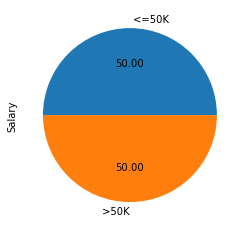

In [34]:
Y_Over.value_counts().plot(kind="pie",autopct="%0.2f")
plt.show()

In [35]:
X_Over["Salary"] = Y_Over

In [36]:
X_Over

,age,workclass,education,educationno,maritalstatus,occupation,relationship,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,Male,0,0,30,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
21235,35,Federal-gov,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,>50K
21236,37,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,>50K
21237,53,Federal-gov,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,>50K
21238,46,Private,Some-college,10,Married-civ-spouse,Sales,Husband,Male,0,1977,60,>50K


In [37]:
final_data=X_Over

In [38]:
final_data.shape

(21240, 12)

In [39]:
final_data['Salary']=le.fit_transform(final_data['Salary'])

In [40]:
final_data=pd.get_dummies(final_data,drop_first=True)

In [41]:
final_data.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Male
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28,12,0,0,40,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,44,10,7688,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [42]:
X=final_data.drop(columns=['Salary'],axis=1)

In [43]:
y=final_data['Salary']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20,random_state=0)

In [45]:
# importing required libraries
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [46]:
#model with default parameters
model = SVC()
model.fit(X_train,y_train)

SVC()

In [47]:
ypred=model.predict(X_test)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, ypred)

0.6445386064030132

In [49]:
## Kernel = p0ly
model_poly = SVC(kernel='poly')
model_poly.fit(X_train,y_train)

SVC(kernel='poly')

In [53]:
ypred=model_poly.predict(X_test)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
accuracy_score(y_test, ypred)

0.5998116760828626

In [55]:
## Kernel = sigmoid
model_sig = SVC(kernel='sigmoid')
model_sig.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [56]:
ypred=model_sig.predict(X_test)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
accuracy_score(y_test, ypred)

0.6259416195856874

### SVM model with kernal =rbf is giving best accuracy